In [11]:
from datetime import datetime
import MetaTrader5 as mt5
import numpy as np

mt5.initialize()

# rates = mt5.copy_rates_from('EURUSD', mt5.TIMEFRAME_H1, datetime(2020, 10, 2, 19), 2000)
# rates2 = mt5.copy_rates_from('EURUSD', mt5.TIMEFRAME_H1, datetime(2020, 6, 2, 19), 2000)
# rates3 = mt5.copy_rates_from('EURUSD', mt5.TIMEFRAME_D1, datetime(2020, 10, 2, 19), 2000)
rates4 = mt5.copy_rates_from('EURUSD', mt5.TIMEFRAME_H1, datetime(2020, 10, 2, 19), 10000)

mt5.shutdown()


True

In [12]:
import plotly.graph_objs as go
from plotly.offline import plot
import pandas as pd
import talib

candle_names = talib.get_function_groups()['Pattern Recognition']
# candle_names = talib.get_functions()

df = pd.DataFrame(rates4).loc[:, [
    'time', 'open', 'high', 'low', 'close', 'tick_volume']]
df = df.rename(columns={'time': 'Time', 'high': 'High', 'low': 'Low',
                        'close': 'Close', 'tick_volume': 'Volume', 'open': 'Open'})

df['Time'] = pd.to_datetime(df['Time'], unit='s')

df['Weekday'] = np.array([x.weekday() for x in df['Time']])

df = df.set_index('Time')

op = df['Open']
hi = df['High']
lo = df['Low']
cl = df['Close']

for candle in candle_names:
    # below is same as;
    # df["CDL3LINESTRIKE"] = talib.CDL3LINESTRIKE(op, hi, lo, cl)
    df[candle] = getattr(talib, candle)(open=op, high=hi, low=lo, close=cl)


In [6]:
candle_rankings = {
    "CDL3LINESTRIKE_Bull": 1, 
    "CDL3LINESTRIKE_Bear": 2,
    "CDL3BLACKCROWS_Bull": 3,
    "CDL3BLACKCROWS_Bear": 3,
    "CDLEVENINGSTAR_Bull": 4,
    "CDLEVENINGSTAR_Bear": 4,
    "CDLTASUKIGAP_Bull": 5,
    "CDLTASUKIGAP_Bear": 5,
    "CDLINVERTEDHAMMER_Bull": 6,
    "CDLINVERTEDHAMMER_Bear": 6,
    "CDLMATCHINGLOW_Bull": 7,
    "CDLMATCHINGLOW_Bear": 7,
    "CDLABANDONEDBABY_Bull": 8,
    "CDLABANDONEDBABY_Bear": 8,
    "CDLBREAKAWAY_Bull": 10,
    "CDLBREAKAWAY_Bear": 10,
    "CDLMORNINGSTAR_Bull": 12,
    "CDLMORNINGSTAR_Bear": 12,
    "CDLPIERCING_Bull": 13,
    "CDLPIERCING_Bear": 13,
    "CDLSTICKSANDWICH_Bull": 14,
    "CDLSTICKSANDWICH_Bear": 14,
    "CDLTHRUSTING_Bull": 15,
    "CDLTHRUSTING_Bear": 15,
    "CDLINNECK_Bull": 17,
    "CDLINNECK_Bear": 17,
    "CDL3INSIDE_Bull": 20,
    "CDL3INSIDE_Bear": 56,
    "CDLHOMINGPIGEON_Bull": 21,
    "CDLHOMINGPIGEON_Bear": 21,
    "CDLDARKCLOUDCOVER_Bull": 22,
    "CDLDARKCLOUDCOVER_Bear": 22,
    "CDLIDENTICAL3CROWS_Bull": 24,
    "CDLIDENTICAL3CROWS_Bear": 24,
    "CDLMORNINGDOJISTAR_Bull": 25,
    "CDLMORNINGDOJISTAR_Bear": 25,
    "CDLXSIDEGAP3METHODS_Bull": 27,
    "CDLXSIDEGAP3METHODS_Bear": 26,
    "CDLTRISTAR_Bull": 28,
    "CDLTRISTAR_Bear": 76,
    "CDLGAPSIDESIDEWHITE_Bull": 46,
    "CDLGAPSIDESIDEWHITE_Bear": 29,
    "CDLEVENINGDOJISTAR_Bull": 30,
    "CDLEVENINGDOJISTAR_Bear": 30,
    "CDL3WHITESOLDIERS_Bull": 32,
    "CDL3WHITESOLDIERS_Bear": 32,
    "CDLONNECK_Bull": 33,
    "CDLONNECK_Bear": 33,
    "CDL3OUTSIDE_Bull": 34,
    "CDL3OUTSIDE_Bear": 39,
    "CDLRICKSHAWMAN_Bull": 35,
    "CDLRICKSHAWMAN_Bear": 35,
    "CDLSEPARATINGLINES_Bull": 36,
    "CDLSEPARATINGLINES_Bear": 40,
    "CDLLONGLEGGEDDOJI_Bull": 37,
    "CDLLONGLEGGEDDOJI_Bear": 37,
    "CDLHARAMI_Bull": 38,
    "CDLHARAMI_Bear": 72,
    "CDLLADDERBOTTOM_Bull": 41,
    "CDLLADDERBOTTOM_Bear": 41,
    "CDLCLOSINGMARUBOZU_Bull": 70,
    "CDLCLOSINGMARUBOZU_Bear": 43,
    "CDLTAKURI_Bull": 47,
    "CDLTAKURI_Bear": 47,
    "CDLDOJISTAR_Bull": 49,
    "CDLDOJISTAR_Bear": 51,
    "CDLHARAMICROSS_Bull": 50,
    "CDLHARAMICROSS_Bear": 80,
    "CDLADVANCEBLOCK_Bull": 54,
    "CDLADVANCEBLOCK_Bear": 54,
    "CDLSHOOTINGSTAR_Bull": 55,
    "CDLSHOOTINGSTAR_Bear": 55,
    "CDLMARUBOZU_Bull": 71,
    "CDLMARUBOZU_Bear": 57,
    "CDLUNIQUE3RIVER_Bull": 60,
    "CDLUNIQUE3RIVER_Bear": 60,
    "CDL2CROWS_Bull": 61,
    "CDL2CROWS_Bear": 61,
    "CDLBELTHOLD_Bull": 62,
    "CDLBELTHOLD_Bear": 63,
    "CDLHAMMER_Bull": 65,
    "CDLHAMMER_Bear": 65,
    "CDLHIGHWAVE_Bull": 67,
    "CDLHIGHWAVE_Bear": 67,
    "CDLSPINNINGTOP_Bull": 69,
    "CDLSPINNINGTOP_Bear": 73,
    "CDLUPSIDEGAP2CROWS_Bull": 74,
    "CDLUPSIDEGAP2CROWS_Bear": 74,
    "CDLGRAVESTONEDOJI_Bull": 77,
    "CDLGRAVESTONEDOJI_Bear": 77,
    "CDLHIKKAKEMOD_Bull": 82,
    "CDLHIKKAKEMOD_Bear": 81,
    "CDLHIKKAKE_Bull": 85,
    "CDLHIKKAKE_Bear": 83,
    "CDLENGULFING_Bull": 84,
    "CDLENGULFING_Bear": 91,
    "CDLMATHOLD_Bull": 86,
    "CDLMATHOLD_Bear": 86,
    "CDLHANGINGMAN_Bull": 87,
    "CDLHANGINGMAN_Bear": 87,
    "CDLRISEFALL3METHODS_Bull": 94,
    "CDLRISEFALL3METHODS_Bear": 89,
    "CDLKICKING_Bull": 96,
    "CDLKICKING_Bear": 102,
    "CDLDRAGONFLYDOJI_Bull": 98,
    "CDLDRAGONFLYDOJI_Bear": 98,
    "CDLCONCEALBABYSWALL_Bull": 101,
    "CDLCONCEALBABYSWALL_Bear": 101,
    "CDL3STARSINSOUTH_Bull": 103,
    "CDL3STARSINSOUTH_Bear": 103,
    "CDLDOJI_Bull": 104,
    "CDLDOJI_Bear": 104,
    "CDLLONGLINE_Bull": 105, 
    "CDLLONGLINE_Bear": 105, 
    "CDLSHORTLINE_Bull": 105, 
    "CDLSHORTLINE_Bear": 105, 
    "CDLSTALLEDPATTERN_Bull":105,
    "CDLSTALLEDPATTERN_Bear":105
}

na = np.array(['CDLENGULFING_Bear','CDLKICKING_Bear'])
n = np.array ([candle_rankings[i] for i in na])
np.any(n < 50)

# df['candlestick_pattern'] = np.nan
# df['candlestick_match_count'] = np.nan

# np_candle_names = np.array(candle_names)

# for index, row in df.iterrows():
#     detected_patterns = np_candle_names[row[candle_names] != 0]
#     # no pattern found
#     if len(detected_patterns) == 0:
#         df.loc[index, 'candlestick_pattern'] = "NO_PATTERN"
#         df.loc[index, 'candlestick_match_count'] = 0
#     # single pattern found
#     elif len(detected_patterns) == 1:
#         # bull pattern 100 or 200
#         if row[detected_patterns[0]] > 0:
#             pattern = detected_patterns[0] + '_Bull'
#         # bear pattern -100 or -200
#         else:
#             pattern = detected_patterns[0] + '_Bear'
#         df.loc[index, 'candlestick_pattern'] = pattern
#         df.loc[index, 'candlestick_match_count'] = 1
#     # # multiple patterns matched -- select best performance
#     else:
#         # filter out pattern names from bool list of values
#         container = []
#         for pattern in detected_patterns:
#             if row[pattern] > 0:
#                 container.append(pattern + '_Bull')
#             else:
#                 container.append(pattern + '_Bear')
#         rank_list = [candle_rankings[p] for p in container]
#         if len(rank_list) == len(container):
#             rank_index_best = rank_list.index(min(rank_list))
#             df.loc[index, 'candlestick_pattern'] = container[rank_index_best]
#             df.loc[index, 'candlestick_match_count'] = len(container)
# # clean up candle columns
# df.drop(candle_names, axis=1, inplace=True)

False

In [18]:

df['Buy'] = np.nan
df['Sell'] = np.nan

np_candle_names = np.array(candle_names)

for index, row in df.iterrows():
    detected_patterns = np_candle_names[row[candle_names] != 0]
    rk = np.array([candle_rankings[i + "_Bull"] for i in detected_patterns])


    if detected_patterns.size < 1 or np.all(rk > 90):
        continue


    b = np.count_nonzero(row[detected_patterns] > 0)
    s = np.count_nonzero(row[detected_patterns] < 0)

    if b == 0:
        df.loc[index, 'Sell'] = row['Open']

    elif s == 0:
        df.loc[index, 'Buy'] = row['Open']


    # # no pattern found
    # if len(detected_patterns) == 0:
    #     continue
    # # single pattern found
    # elif len(detected_patterns) == 1:
    #     # continue
    #     # bull pattern 100 or 200
    #     if row[detected_patterns[0]] > 0:
    #         df.loc[index, 'BuyX'] = row['Open']
    #     # bear pattern -100 or -200
    #     else:
    #         df.loc[index, 'SellX'] = row['Open']
    # # # multiple patterns matched -- select best performance
    # else:
    #     b = np.count_nonzero(row[detected_patterns] > 0)
    #     s = np.count_nonzero(row[detected_patterns] < 0)

    #     if b == 0:
    #         df.loc[index, 'Sell'] = row['Open']

    #     elif s == 0:
    #         df.loc[index, 'Buy'] = row['Open']

    #     # filter out pattern names from bool list of values
        # b = 0
        # s = 0
        # for pattern in detected_patterns:
        #     if row[pattern] > 0:
        #         b += 1
        #     else:
        #         s += 1
        # if b > s:
        #     df.loc[index, 'Buy'] = row['Open']
        # if s > b:
        #     df.loc[index, 'Sell'] = row['Open']


In [117]:
d = pd.DataFrame({'col1': [1, 2, 0], 'col2': [0, 5, 4], 'col3': [1,2,0]})

for index, row in d.iterrows():
    # print(row['col2'])
    print(np.count_nonzero(row[['col1','col2']] != 0))

1
2
1


In [68]:

trace = go.Candlestick(
    open=op,
    high=hi,
    low=lo,
    close=cl)

plot([trace])


'temp-plot.html'

In [125]:
print(df['Buy'])

Time
2020-06-09 04:00:00   NaN
2020-06-09 05:00:00   NaN
2020-06-09 06:00:00   NaN
2020-06-09 07:00:00   NaN
2020-06-09 08:00:00   NaN
                       ..
2020-10-02 07:00:00   NaN
2020-10-02 08:00:00   NaN
2020-10-02 09:00:00   NaN
2020-10-02 10:00:00   NaN
2020-10-02 11:00:00   NaN
Name: Buy, Length: 2000, dtype: float64


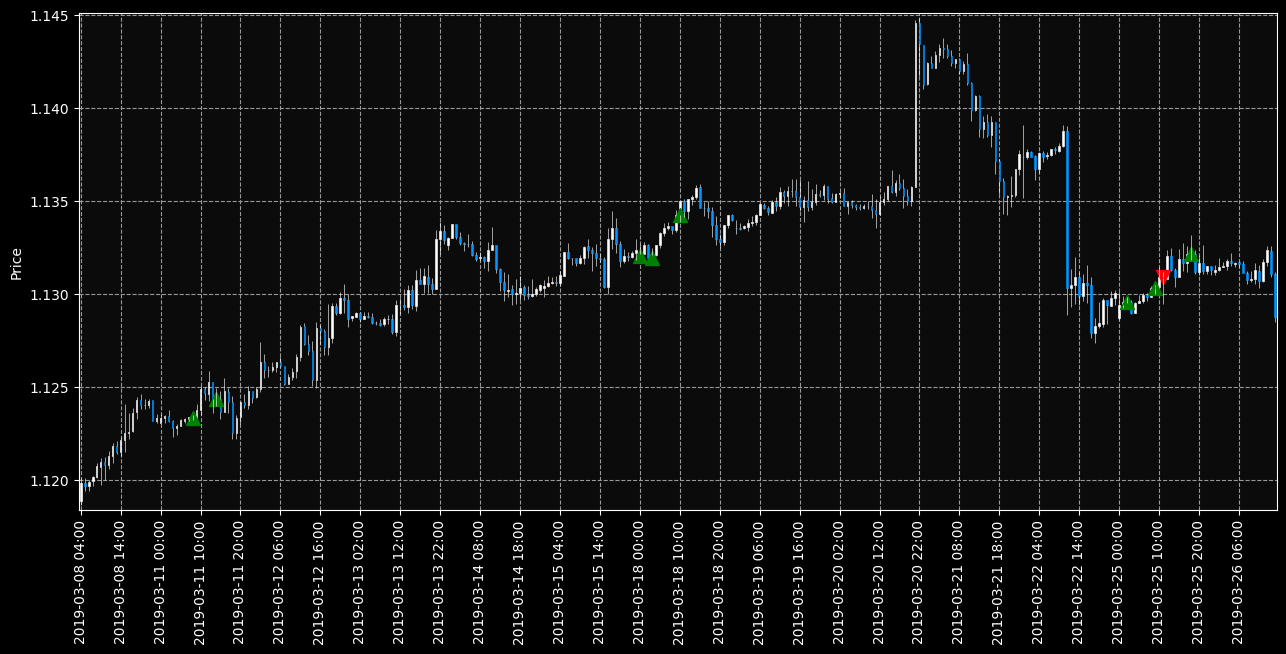

In [14]:
import matplotlib.pyplot as plt
import matplotlib.figure as mpfg
import mplfinance as mpf

p = df[200:500]
# p = df
apds = [
    mpf.make_addplot(p['Sell'], type='scatter',markersize=100, marker='v', color='red'),
    mpf.make_addplot(p['Buy'], type='scatter', markersize=100, marker='^', color='green'),
    # mpf.make_addplot(p['SellX'], type='scatter',markersize=100, marker='v', color='orange'),
    # mpf.make_addplot(p['BuyX'], type='scatter', markersize=100, marker='^', color='lime')
]

fig, axes = mpf.plot(p, addplot=apds, figratio=(24, 10), type='candle', style='nightclouds', volume=False,
                     datetime_format='%Y-%m-%d %H:%M', xrotation=90, tight_layout=True, returnfig=True)
axes[0].locator_params(nbins=50, axis='x')
plt.show()


In [21]:
from backtesting import Backtest, Strategy
from backtesting.lib import TrailingStrategy, SignalStrategy


class SmaCross(SignalStrategy, TrailingStrategy):
    def init(self):
        super().init()
        self.set_trailing_sl(4)
        # self.set_atr_periods(48)

        self.set_signal(entry_size=((self.data.Buy > 0) * 2000 - (self.data.Sell > 0) * 2000))

    # def next(self):
    #     if self.data.Buy > 0:
    #         # self.buy(size=4000)
    #         # self.buy(size=4000,limit=self.data.Open, tp=self.data.Open+0.01)
    #         # self.buy(size=4000,limit=self.data.Open, sl=self.data.Open-0.005)
    #         self.buy(size=4000, sl=self.data.Open-0.005,tp=self.data.Open+0.01,limit=self.data.Open)
    #     elif self.data.Sell > 0:
    #         # self.sell(size=4000)
    #         # self.sell(size=4000,limit=self.data.Open, tp=self.data.Open-0.01)
    #         # self.sell(size=4000,limit=self.data.Open, sl=self.data.Open+0.005)
    #         self.sell(size=4000, sl=self.data.Open+0.005,tp=self.data.Open-0.01,limit=self.data.Open)



# bt = Backtest(df, SmaCross, commission=.00007,hedging=False,margin=0.01,exclusive_orders=True)
bt = Backtest(df, SmaCross, commission=.00007, hedging=True, margin=0.01, exclusive_orders=False)
stats = bt.run()
bt.plot()
